In [37]:
%matplotlib inline

import re
import pandas as pd
import numpy as np
import statsmodels.robust.scale
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib
import pylab
import scipy

# Test user activity

In [38]:
df = pd.read_csv("201x_user_activity_2.csv", header=None, names=["Date", "Tweets", "Retweets", "Mentions", "URLs", "Media", "Hashtags"], parse_dates=["Date"])

df = df.sort("Date")

df.index = range(0, len(df))
df = df[207:]

# print df

# Full data graph

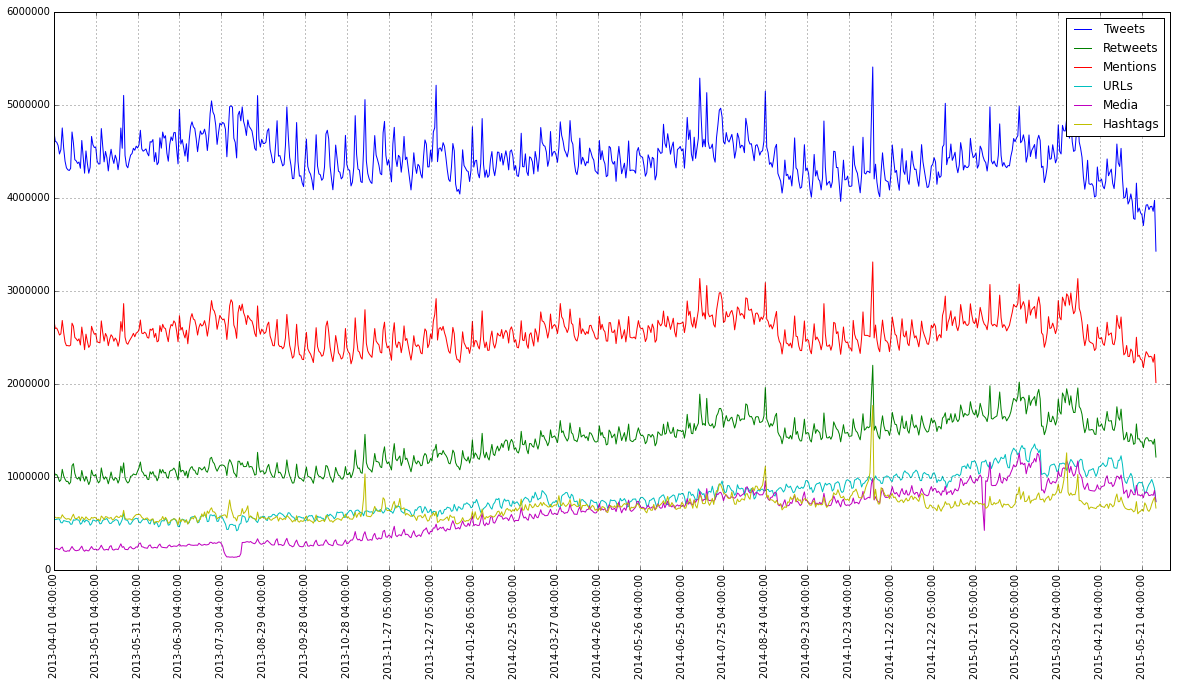

In [39]:
plt.figure(figsize=(20,10))

for x in (df.columns[1:]):
    plt.plot(df[x], label=x)
    
dateList = df["Date"].tolist()
    
xtickArr = range(0, len(df), 30)
plt.xticks(xtickArr, [dateList[y] for y in xtickArr], rotation='vertical')
plt.grid(b=True)
plt.legend()

# Normalize Activities by Tweet Count

In [40]:
for col in df.columns[2:]:
    print col
    df[col + "_norm"] = df[["Tweets", col]].apply(lambda x: float(x[col]) / float(x["Tweets"]), axis=1)

Retweets
Mentions
URLs
Media
Hashtags


In [41]:
colToDrop = filter(lambda x: "_norm" not in x and "Date" != x and "Tweets" != x, df.columns.tolist())
print colToDrop

normDf = df.drop(colToDrop, axis=1)

normDf.columns = map(lambda x: x.replace("_norm", ""), normDf.columns.tolist())
df = normDf

['Retweets', 'Mentions', 'URLs', 'Media', 'Hashtags']


# Checking Anomaly in Nov. 2014

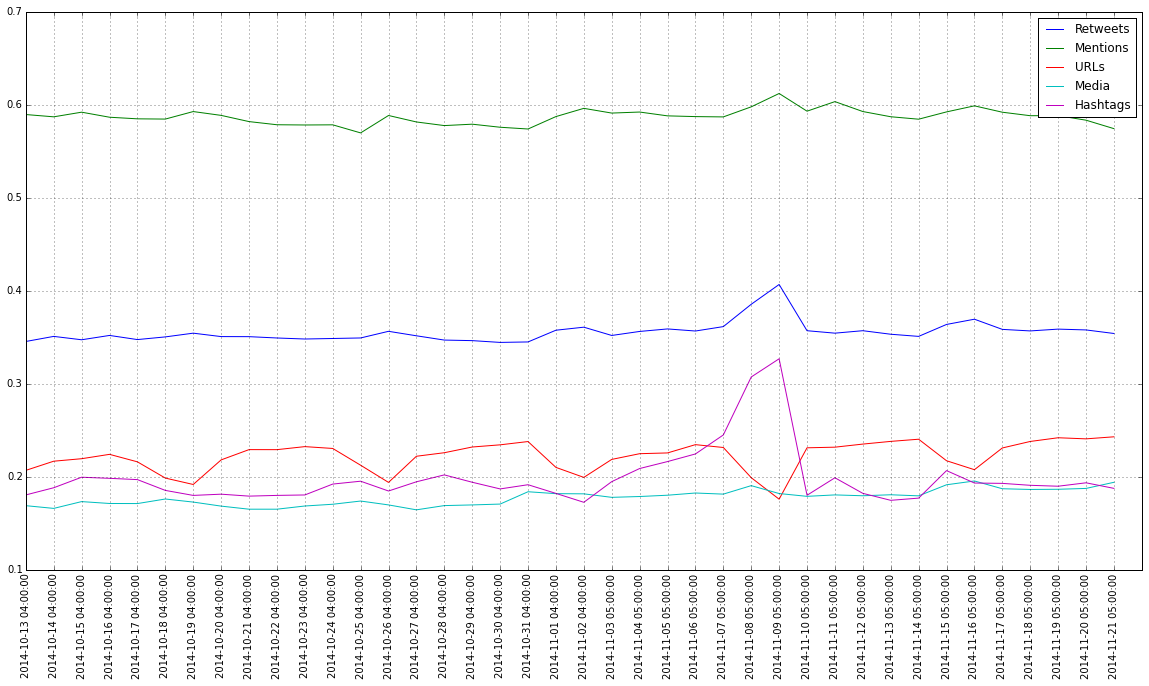

In [42]:
smallDf = df[560:600]

plt.figure(figsize=(20,10))

for x in (smallDf.columns[2:]):
    plt.plot(smallDf[x], label=x)
    
dateList = smallDf["Date"].tolist()
    
xtickArr = range(0, len(smallDf), 1)
plt.xticks(xtickArr, [dateList[y] for y in xtickArr], rotation='vertical')
plt.grid(b=True)
plt.legend()

# Boston Marathon

In [43]:
font = {
'family' : 'normal',
'size'   : 12
}

matplotlib.rc('font', **font) 

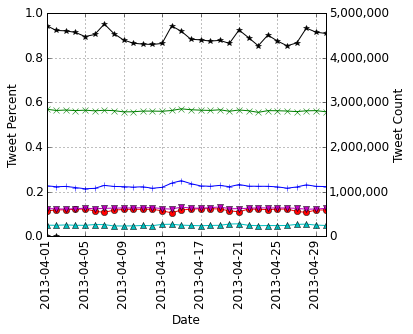

In [44]:
smallDf = df[0:30]
smallDf.index = range(0, len(smallDf))

fig = pylab.figure(figsize=(5,4))
# plt.figure(figsize=(5,4))
ax = pylab.gca()

ax.set_xlabel('Date')
ax.set_ylabel('Tweet Percent')
ax.set_ylim((0, 1.0))

lineTypeArr = ["+", "x", "o", "^", "v", "s"]

for (i, x) in enumerate(smallDf.columns[2:]):
    plt.plot(smallDf[x], label=x, marker=lineTypeArr[i])
plt.plot([0, 0], label="Tweets", marker="*", color="black")

dateList = map(lambda x: re.sub("0.:00:00", "", x.__str__()), smallDf["Date"].tolist())
    
xtickArr = range(0, len(smallDf), 4)
plt.xticks(xtickArr, [dateList[y] for y in xtickArr], rotation='vertical')
plt.grid(b=True)

ax2 = ax.twinx()

ax2.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
 

ax2.plot(smallDf["Tweets"], label="Tweets", marker="*", color="black")
ax2.set_ylim((0,5000000))
ax2.set_ylabel("Tweet Count")

# plt.legend()
fig.savefig("nsf_report/boston_acts.pdf", transparent=True, bbox_inches='tight', pad_inches=0.1) 

# create a second figure for the legend
figLegend = pylab.figure(figsize = (15,1.5))

# produce a legend for the objects in the other figure
pylab.figlegend(*ax.get_legend_handles_labels(), 
#                 bbox_to_anchor=(0., 1.02, 1., .102),
           ncol=6, mode="expand",
                loc =10)

figLegend.savefig("nsf_report/gen_legend.pdf", frameon=True)

In [45]:
# targetColumn = "Avg % of Friends"
targetColumn = "Retweets"

mad = statsmodels.robust.scale.mad(smallDf[targetColumn], axis=0)
dif = np.fabs(smallDf[targetColumn] - np.median(smallDf[targetColumn]))/mad
print "Max Dif:", max(dif)
indices = np.where(dif > 4)

print dif.ix[indices]
print smallDf["Date"].ix[indices]

Max Dif: 6.40534795487
14    6.405348
Name: Retweets, dtype: float64
14   2013-04-15 04:00:00
Name: Date, dtype: datetime64[ns]


# Sydney Attack

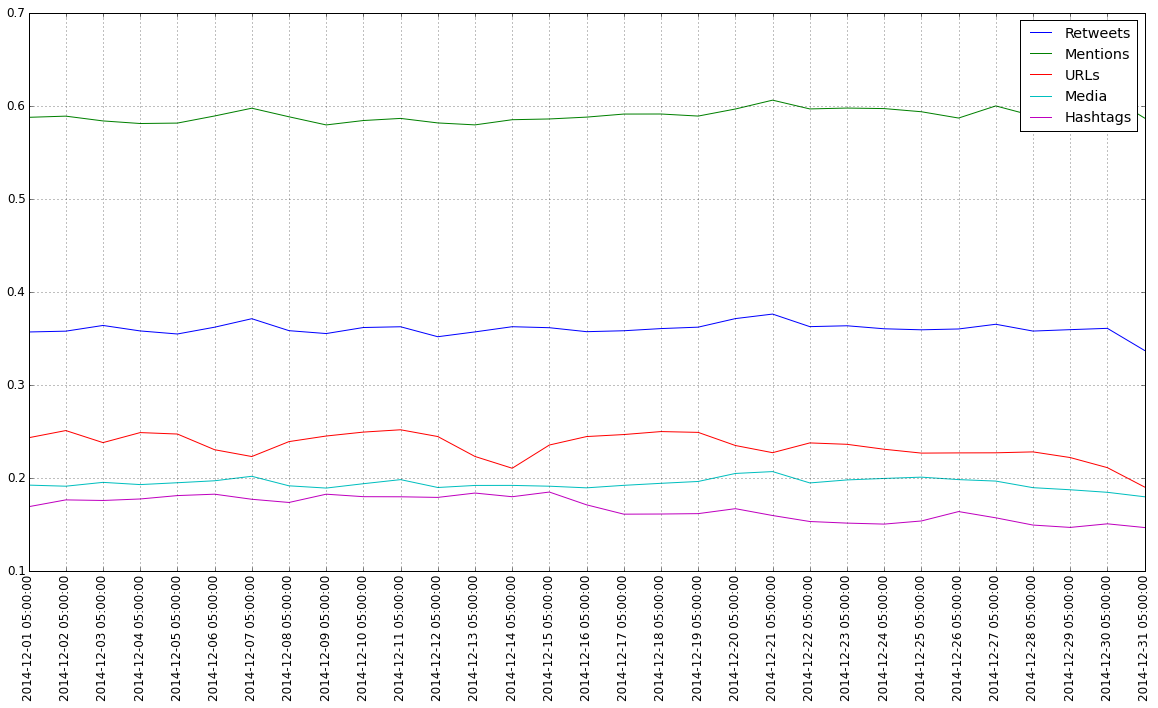

In [46]:
smallDf = df[609:640]
# smallDf = df[607:635]
smallDf.index = range(0, len(smallDf))

plt.figure(figsize=(20,10))

for x in (smallDf.columns[2:]):
    plt.plot(smallDf[x], label=x)
    
dateList = smallDf["Date"].tolist()
    
xtickArr = range(0, len(smallDf), 1)
plt.xticks(xtickArr, [dateList[y] for y in xtickArr], rotation='vertical')
plt.grid(b=True)
plt.legend()

In [47]:
# targetColumn = "Avg % of Friends"
targetColumn = "Retweets"

mad = statsmodels.robust.scale.mad(smallDf[targetColumn], axis=0)
dif = np.fabs(smallDf[targetColumn] - np.median(smallDf[targetColumn]))/mad
print "Max Dif:", max(dif)
indices = np.where(dif > 2)

print dif.ix[indices]
print smallDf["Date"].ix[indices]

Max Dif: 6.78040760376
6     3.144744
11    2.484211
19    3.179954
20    4.592679
30    6.780408
Name: Retweets, dtype: float64
6    2014-12-07 05:00:00
11   2014-12-12 05:00:00
19   2014-12-20 05:00:00
20   2014-12-21 05:00:00
30   2014-12-31 05:00:00
Name: Date, dtype: datetime64[ns]


# Charlie Hebdo

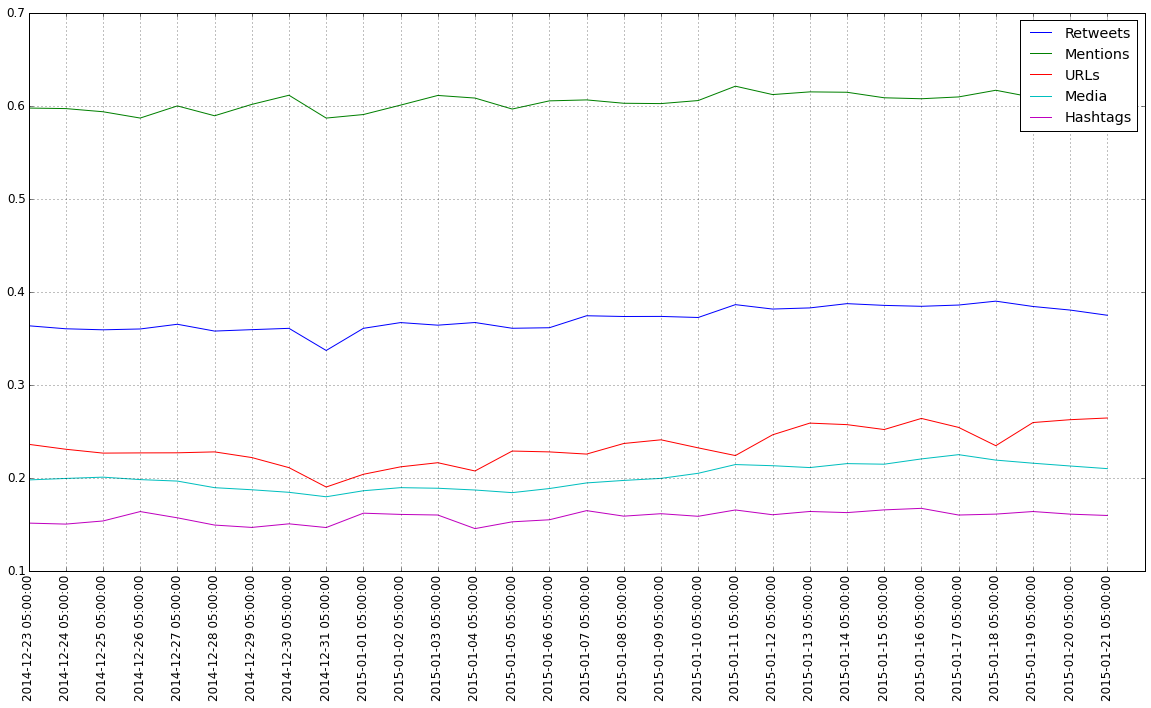

In [48]:
smallDf = df[631:661]
smallDf.index = range(0, len(smallDf))

plt.figure(figsize=(20,10))

for x in (smallDf.columns[2:]):
    plt.plot(smallDf[x], label=x)
    
dateList = smallDf["Date"].tolist()
    
xtickArr = range(0, len(smallDf), 1)
plt.xticks(xtickArr, [dateList[y] for y in xtickArr], rotation='vertical')
plt.grid(b=True)
plt.legend()

In [49]:
# targetColumn = "Avg % of Friends"
targetColumn = "Retweets"

mad = statsmodels.robust.scale.mad(smallDf[targetColumn], axis=0)
dif = np.fabs(smallDf[targetColumn] - np.median(smallDf[targetColumn]))/mad
print "Max Dif:", max(dif)
indices = np.where(dif > 2)

print dif.ix[indices]
print smallDf["Date"].ix[indices]

Max Dif: 2.31818776606
8    2.318188
Name: Retweets, dtype: float64
8   2014-12-31 05:00:00
Name: Date, dtype: datetime64[ns]


In [50]:
# All events
eventMap = {
    "Boston" : {
        "range": (0, 30)
    },
    "Sydney" : {
        "range": (609, 640)
    },
    "Paris" : {
        "range": (631, 661)
    }
}

Paris


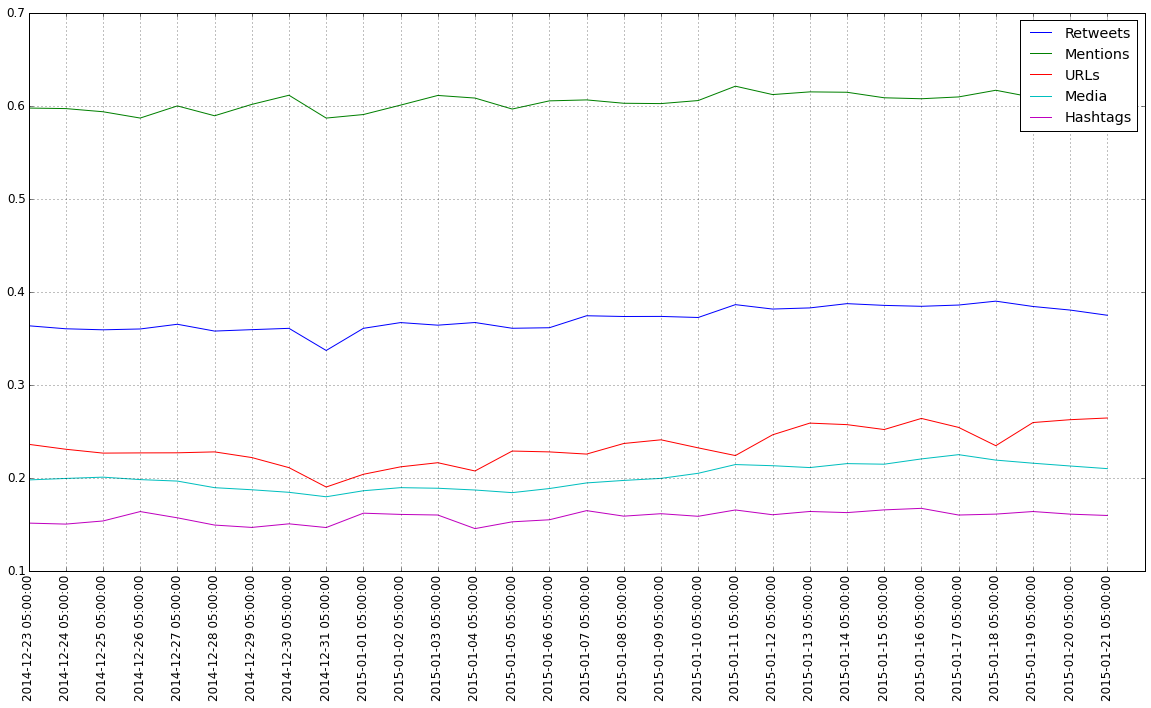

	Tweets
--------------------
Max Dif: 4.69274670165
8    4.692747
Name: Tweets, dtype: float64
8   2014-12-31 05:00:00
Name: Date, dtype: datetime64[ns]
--------------------
	Retweets
--------------------
Max Dif: 2.31818776606
Series([], name: Retweets, dtype: float64)
Series([], name: Date, dtype: datetime64[ns])
--------------------
	Mentions
--------------------
Max Dif: 1.72676952517
Series([], name: Mentions, dtype: float64)
Series([], name: Date, dtype: datetime64[ns])
--------------------
	URLs
--------------------
Max Dif: 2.17217089091
Series([], name: URLs, dtype: float64)
Series([], name: Date, dtype: datetime64[ns])
--------------------
	Media
--------------------
Max Dif: 1.51266213526
Series([], name: Media, dtype: float64)
Series([], name: Date, dtype: datetime64[ns])
--------------------
	Hashtags
--------------------
Max Dif: 2.6035901659
Series([], name: Hashtags, dtype: float64)
Series([], name: Date, dtype: datetime64[ns])
--------------------
Boston


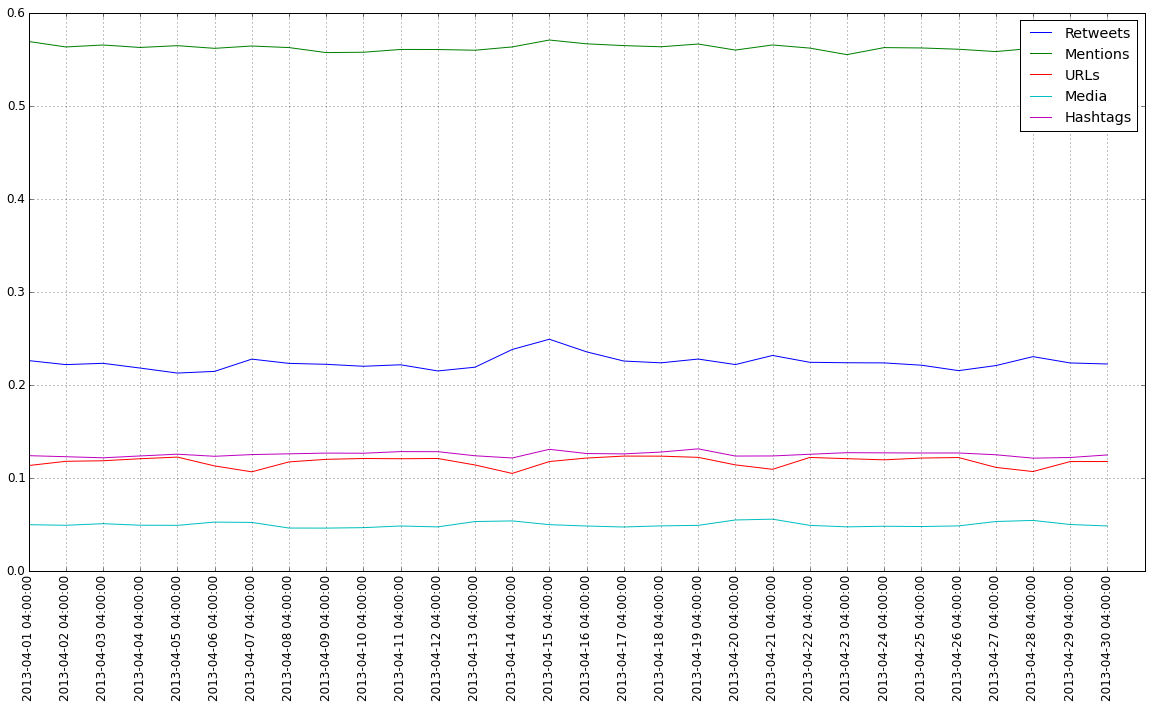

	Tweets
--------------------
Max Dif: 1.51609552071
Series([], name: Tweets, dtype: float64)
Series([], name: Date, dtype: datetime64[ns])
--------------------
	Retweets
--------------------
Max Dif: 6.40534795487
13    3.681456
14    6.405348
15    3.057339
Name: Retweets, dtype: float64
13   2013-04-14 04:00:00
14   2013-04-15 04:00:00
15   2013-04-16 04:00:00
Name: Date, dtype: datetime64[ns]
--------------------
	Mentions
--------------------
Max Dif: 2.65565004739
Series([], name: Mentions, dtype: float64)
Series([], name: Date, dtype: datetime64[ns])
--------------------
	URLs
--------------------
Max Dif: 3.52755714528
6     3.099754
13    3.527557
27    3.028089
Name: URLs, dtype: float64
6    2013-04-07 04:00:00
13   2013-04-14 04:00:00
27   2013-04-28 04:00:00
Name: Date, dtype: datetime64[ns]
--------------------
	Media
--------------------
Max Dif: 3.06847476116
20    3.068475
Name: Media, dtype: float64
20   2013-04-21 04:00:00
Name: Date, dtype: datetime64[ns]
-----------

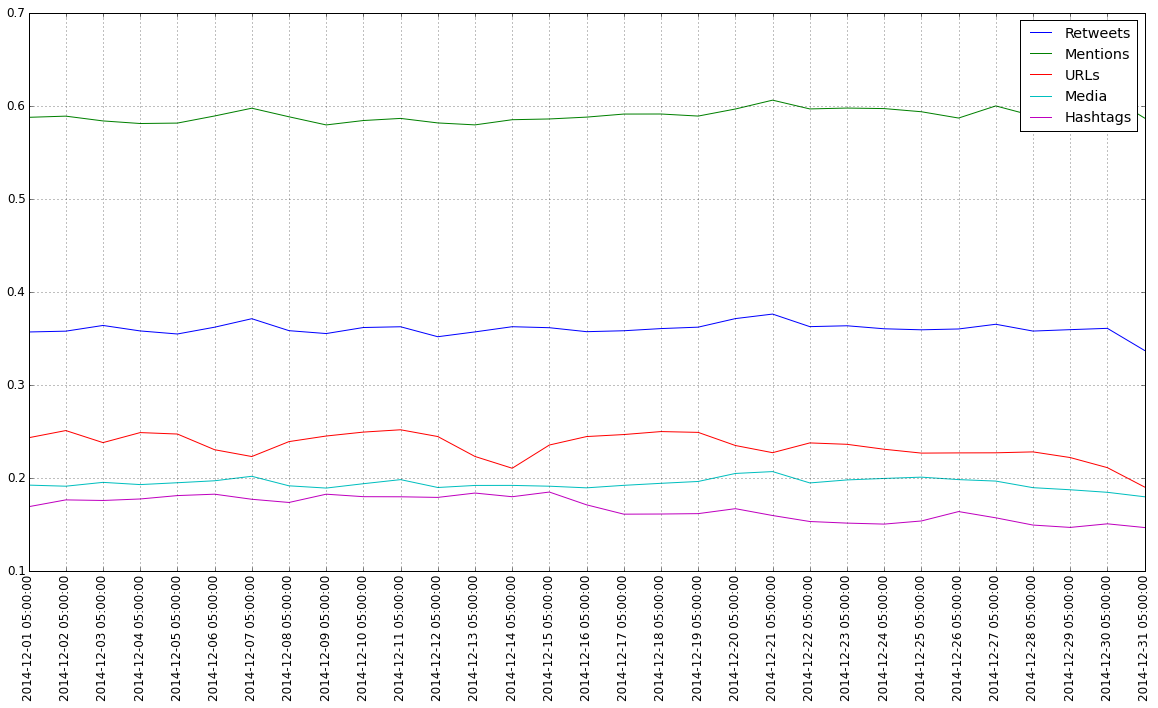

	Tweets
--------------------
Max Dif: 5.05951897523
30    5.059519
Name: Tweets, dtype: float64
30   2014-12-31 05:00:00
Name: Date, dtype: datetime64[ns]
--------------------
	Retweets
--------------------
Max Dif: 6.78040760376
6     3.144744
19    3.179954
20    4.592679
30    6.780408
Name: Retweets, dtype: float64
6    2014-12-07 05:00:00
19   2014-12-20 05:00:00
20   2014-12-21 05:00:00
30   2014-12-31 05:00:00
Name: Date, dtype: datetime64[ns]
--------------------
	Mentions
--------------------
Max Dif: 3.20120251413
29    3.201203
Name: Mentions, dtype: float64
29   2014-12-30 05:00:00
Name: Date, dtype: datetime64[ns]
--------------------
	URLs
--------------------
Max Dif: 3.35686325432
30    3.356863
Name: URLs, dtype: float64
30   2014-12-31 05:00:00
Name: Date, dtype: datetime64[ns]
--------------------
	Media
--------------------
Max Dif: 2.99980014985
Series([], name: Media, dtype: float64)
Series([], name: Date, dtype: datetime64[ns])
--------------------
	Hashtags
----

In [51]:
for (eventName, event) in eventMap.items():
    print eventName
    
    smallDf = df[event["range"][0]:event["range"][1]]
    smallDf.index = range(0, len(smallDf))

    plt.figure(figsize=(20,10))

    for x in (smallDf.columns[2:]):
        plt.plot(smallDf[x], label=x)

    dateList = smallDf["Date"].tolist()

    xtickArr = range(0, len(smallDf), 1)
    plt.xticks(xtickArr, [dateList[y] for y in xtickArr], rotation='vertical')
    plt.grid(b=True)
    plt.legend()
    plt.show()
    
    for targetColumn in smallDf.columns[1:]:

        print "\t", targetColumn
        print "--------------------"
        mad = statsmodels.robust.scale.mad(smallDf[targetColumn], axis=0)
        dif = np.fabs(smallDf[targetColumn] - np.median(smallDf[targetColumn]))/mad
        print "Max Dif:", max(dif)
        indices = np.where(dif > 3)

        print dif.ix[indices]
        print smallDf["Date"].ix[indices]
        print "--------------------"

In [52]:
for (eventName, event) in eventMap.items():
    
    smallDf = df[event["range"][0]:event["range"][1]]
    smallDf.index = range(0, len(smallDf))

    tweetCount = np.sum(smallDf["Tweets"])
    print eventName, tweetCount

Paris 132803711
Boston 134245610
Sydney 134226491


In [61]:
smallDf["Date"].tolist()[0].to_pydatetime().strftime("%b %d")

'Dec 01'

Paris
Boston
Sydney


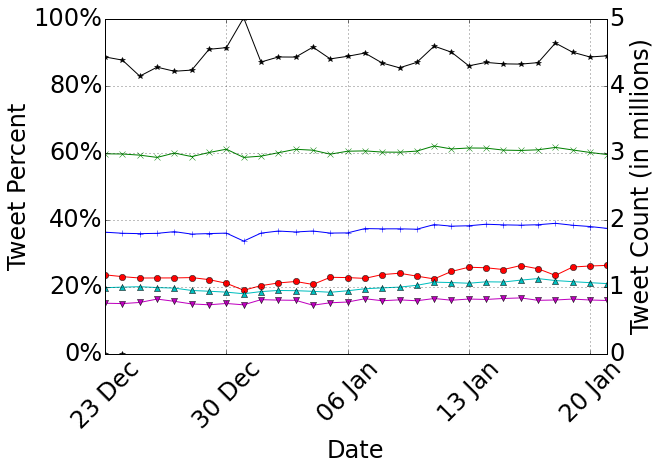

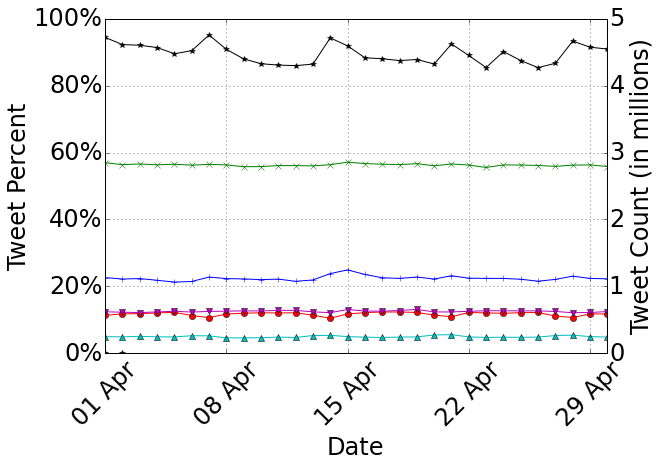

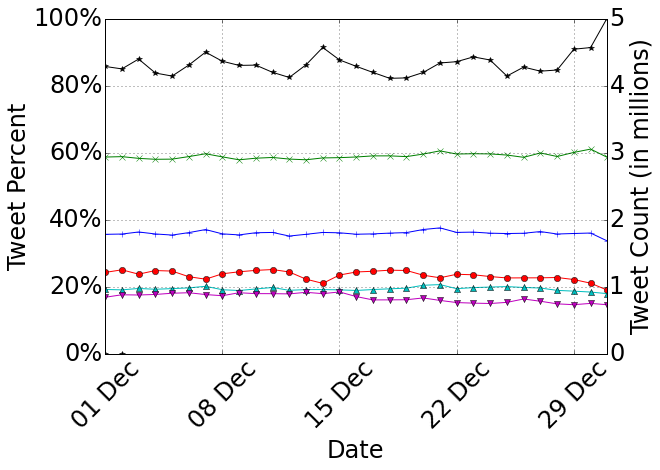

In [63]:
font = {
    'family' : 'normal',
    'sans-serif' : 'Helvetica',
    'size'   : 24
}

matplotlib.rc('font', **font) 

for (eventName, event) in eventMap.items():
    print eventName
    
    smallDf = df[event["range"][0]:event["range"][1]]
    smallDf.index = range(0, len(smallDf))

    fig = pylab.figure(figsize=(9,6))
    
    # plt.figure(figsize=(5,4))
    ax = pylab.gca()

    ax.set_xlabel('Date')
    ax.set_ylabel('Tweet Percent')
    ax.set_ylim((0, 1.0))

    lineTypeArr = ["+", "x", "o", "^", "v", "s"]

    for (i, x) in enumerate(smallDf.columns[2:]):
        plt.plot(smallDf[x], label=x, marker=lineTypeArr[i])
    plt.plot([0, 0], label="Tweets", marker="*", color="black")

#     dateList = map(lambda x: re.sub("0.:00:00", "", x.__str__()), smallDf["Date"].tolist())
#     dateList = map(lambda x: re.sub("201[3-5]-", "", x), dateList)

    dateList = map(lambda x: x.to_pydatetime().strftime("%d %b"), smallDf["Date"].tolist())

    xtickArr = range(0, len(smallDf), 7)
    plt.xticks(xtickArr, [dateList[y] for y in xtickArr], rotation=45)
    plt.grid(b=True)

    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: "%d%%" % int(x * 100)))
    
    ax2 = ax.twinx()

#     ax2.get_yaxis().set_major_formatter(
#         matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    ax2.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: int(x) / 1000000))


    ax2.plot(smallDf["Tweets"], label="Tweets", marker="*", color="black")
    ax2.set_ylim((0,5000000))
    ax2.set_ylabel("Tweet Count (in millions)")

    # plt.legend()
    fig.savefig("nsf_report/" + eventName + "_acts.pdf", transparent=True, bbox_inches='tight', pad_inches=0.1) 

#     # create a second figure for the legend
#     figLegend = pylab.figure(figsize = (2,3))

#     # produce a legend for the objects in the other figure
#     pylab.figlegend(*ax.get_legend_handles_labels(), loc ='upper left')

#     figLegend.savefig("gen_legend.pdf", frameon=True)

# Relevant Tweets

In [64]:
# All events
eventMap = {
    "Boston" : {
        "file": "2013-04-xx-boston_activities.csv",
        "range": (1, -1)
    },
    "Sydney" : {
        "file": "2014-12-xx-sydney_activities.csv",
        "range": (1, -1)
    },
    "Paris" : {
        "file": "20145-1201-hebdoparis_activities.csv",
        "range": (23, -9)
    }
}

Boston
Retweets
Mentions
URLs
Media
Hashtags
['Retweets', 'Mentions', 'URLs', 'Media', 'Hashtags']
Retweets
Max Dif: 3.46912176966
14    0.681888
15    3.469122
16    3.267207
17    2.516836
18    2.433164
Name: Retweets, dtype: float64
14   2013-04-14 04:00:00
15   2013-04-15 04:00:00
16   2013-04-16 04:00:00
17   2013-04-17 04:00:00
18   2013-04-18 04:00:00
Name: Date, dtype: datetime64[ns]
Mentions
Max Dif: 3.3748095568
11    0.438282
18    0.548121
27    0.353396
Name: Mentions, dtype: float64
11   2013-04-11 04:00:00
18   2013-04-18 04:00:00
27   2013-04-27 04:00:00
Name: Date, dtype: datetime64[ns]
URLs
Max Dif: 2.98380275367
14    0.701110
21    1.560895
23    1.727667
24    2.983803
Name: URLs, dtype: float64
14   2013-04-14 04:00:00
21   2013-04-21 04:00:00
23   2013-04-23 04:00:00
24   2013-04-24 04:00:00
Name: Date, dtype: datetime64[ns]
Media
Max Dif: 4.38456770589
12    1.488431
14    0.296912
15    3.266262
17    0.839815
18    3.397435
19    3.016544
20    4.201849
Name:

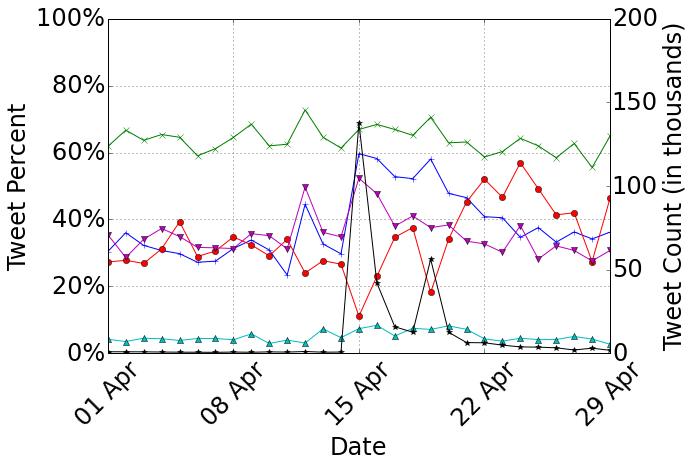

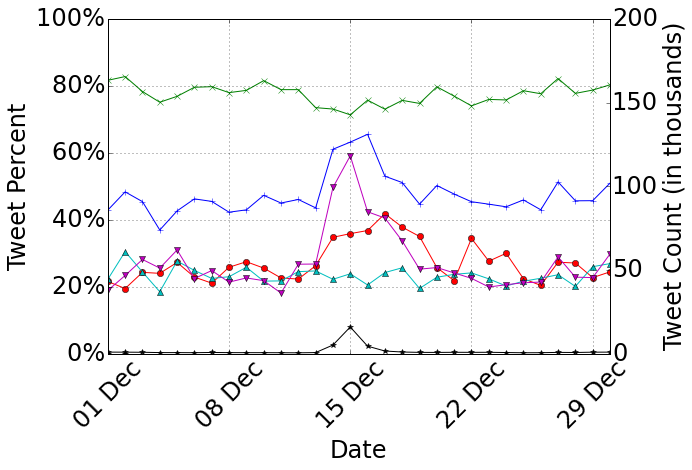

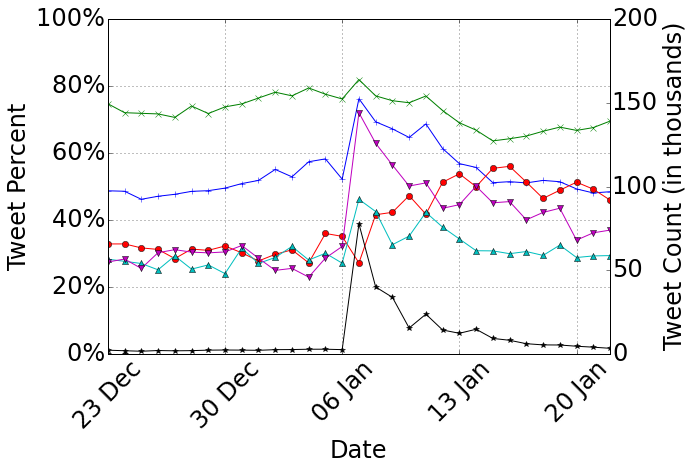

In [65]:
for eventName in ["Boston", "Sydney", "Paris"]:
    print eventName
    eventData = eventMap[eventName]
    
    df = pd.read_csv(eventData["file"], header=None, names=["Date", "Tweets", "Retweets", "Mentions", "URLs", "Media", "Hashtags"], parse_dates=["Date"])

    df = df.sort("Date")
    df.index = range(0, len(df))

    for col in df.columns[2:]:
        print col
        df[col + "_norm"] = df[["Tweets", col]].apply(lambda x: float(x[col]) / float(x["Tweets"]), axis=1)

    colToDrop = filter(lambda x: "_norm" not in x and "Date" != x and "Tweets" != x, df.columns.tolist())
    print colToDrop

    normDf = df.drop(colToDrop, axis=1)

    normDf.columns = map(lambda x: x.replace("_norm", ""), normDf.columns.tolist())
    df = normDf

    smallDf = df[eventData["range"][0]:eventData["range"][1]]

    fig = pylab.figure(figsize=(9,6))

    # plt.figure(figsize=(5,4))
    ax = pylab.gca()

    ax.set_xlabel('Date')
    ax.set_ylabel('Tweet Percent')
    ax.set_ylim((0, 1.0))

    lineTypeArr = ["+", "x", "o", "^", "v", "s"]

    for (i, x) in enumerate(smallDf.columns[2:]):
        plt.plot(smallDf[x], label=x, marker=lineTypeArr[i])
    plt.plot([0, 0], label="Tweets", marker="*", color="black")

#     dateList = map(lambda x: re.sub("0.:00:00", "", x.__str__()), smallDf["Date"].tolist())
#     dateList = map(lambda x: re.sub("201[3-5]-", "", x), dateList)

    dateList = map(lambda x: x.to_pydatetime().strftime("%d %b"), smallDf["Date"].tolist())

    xtickArr = range(0, len(smallDf), 7)
    plt.xticks(xtickArr, [dateList[y] for y in xtickArr], rotation=45)
    plt.grid(b=True)

    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: "%d%% " % int(x * 100)))
    
    ax2 = ax.twinx()

    #     ax2.get_yaxis().set_major_formatter(
    #         matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    ax2.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: int(x) / 1000))


    ax2.plot(smallDf["Tweets"], label="Tweets", marker="*", color="black")
    ax2.set_ylim((0,200000))
    ax2.set_ylabel("Tweet Count (in thousands)")
    
    fig.savefig("nsf_report/" + eventName + "_rel_acts.pdf", transparent=True, bbox_inches='tight', pad_inches=0.1) 

    for (i, x) in enumerate(smallDf.columns[2:]):
        mad = statsmodels.robust.scale.mad(smallDf[x], axis=0)
        dif = np.fabs(smallDf[x] - np.median(smallDf[x]))/mad
        print x
        print "Max Dif:", max(dif)
        indices = np.where(dif > 2)

        print dif.ix[indices]
        print smallDf["Date"].ix[indices]

# User Follower Counts

In [66]:
# All events
eventMap = {
    "Boston" : {
        "file": "2013_04_bpd_follower_counts.csv",
        "range": (0, -1),
        "splitIndex": 10
    },
    "Sydney" : {
        "file": "2014_12_nswpd_follower_counts.csv",
        "range": (0, -1),
        "splitIndex": 10
    },
    "Paris" : {
        "file": "20145-1201_hebdo_follower_counts.csv",
        "range": (26, -9),
        "splitIndex": 14
    }
}

Boston
Avg 2013-04-14 04:00:00 2.19952383679e-06 54290.9 250716.537729
Sydney
Avg 2014-12-14 05:00:00 2.60850724792e-12 61066.766667 78663.8517471
Paris
Avg 2015-01-10 05:00:00 6.35034557548e-10 106559.039293 343468.458333


,Date,Activity,p,Before Mean,After Mean,Event
0,2013-04-14 04:00:00,Avg,2.199524e-06,54290.900000,250716.537729,54678.0000
1,2014-12-14 05:00:00,Avg,2.608507e-12,61066.766667,78663.851747,64371.8000
2,2015-01-10 05:00:00,Avg,6.350346e-10,106559.039293,343468.458333,298183.6667


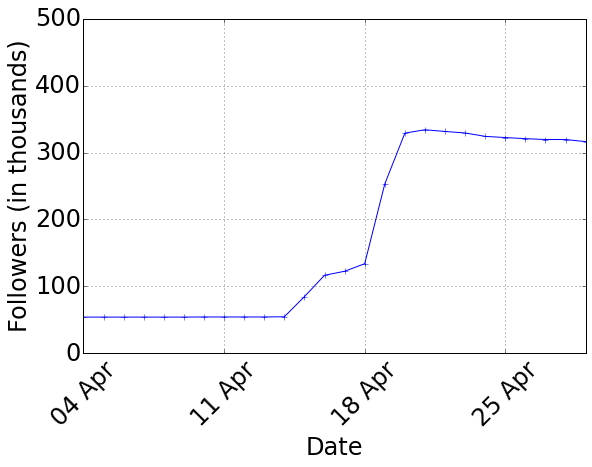

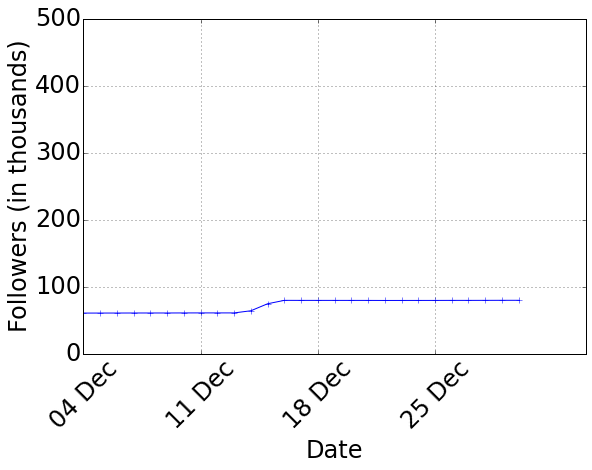

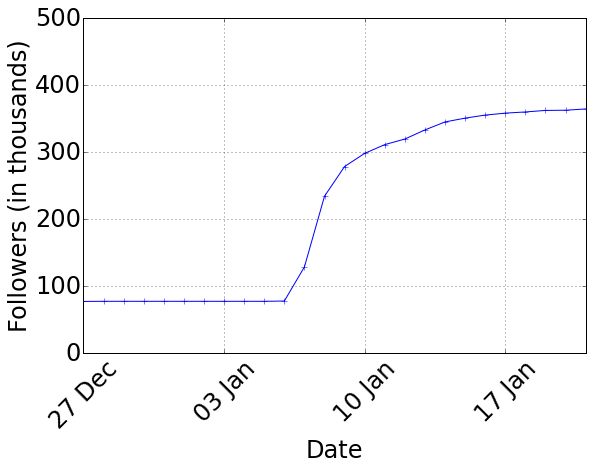

In [67]:
statsList = []

for eventName in ["Boston", "Sydney", "Paris"]:
    print eventName
    eventData = eventMap[eventName]
    
    df = pd.read_csv(eventData["file"], header=None, names=["Date", "Sum", "Count", "Avg"], parse_dates=["Date"])

    df = df.sort("Date")
    df.index = range(0, len(df))
    
    smallDf = df[eventData["range"][0]:eventData["range"][1]]
    smallDf.index = range(0, smallDf.shape[0])

    fig = pylab.figure(figsize=(9,6))

#     font = {'family' : 'normal',
#             'size'   : 18}

#     matplotlib.rc('font', **font) 

    # plt.figure(figsize=(5,4))
    ax = pylab.gca()

    ax.set_xlabel('Date')
    ax.set_ylabel('Followers (in thousands)')
    
    thisMax = max(smallDf["Avg"])
    yMaxLim = 500000 if thisMax > 100000 else 500000
    ax.set_ylim((0, yMaxLim))

    lineTypeArr = ["+", "x", "o", "^", "v", "s"]
    
    plt.plot(smallDf["Avg"], label="Follower Count", marker=lineTypeArr[0])

#     dateList = map(lambda x: re.sub("0.:00:00", "", x.__str__()), smallDf["Date"].tolist())
#     dateList = map(lambda x: re.sub("201[3-5]-", "", x), dateList)

    dateList = map(lambda x: x.to_pydatetime().strftime("%d %b"), smallDf["Date"].tolist())

    xtickArr = range(0, len(smallDf), 7)
    plt.xticks(xtickArr, [dateList[y] for y in xtickArr], rotation=45)
    plt.grid(b=True)
    
    splitIndex = eventData["splitIndex"]
    dateIndex = splitIndex
    
    x = "Avg"
    (t, p) = scipy.stats.ttest_ind(smallDf[x][0:splitIndex], smallDf[x][splitIndex:], equal_var=False)
    infoTuple = (smallDf["Date"][dateIndex], x, p, smallDf[x][0:splitIndex].mean(), smallDf[x][splitIndex:].mean(), smallDf[x].tolist()[splitIndex])
    statsList.append(infoTuple)
    print x, smallDf["Date"][dateIndex], p, smallDf[x][0:splitIndex].mean(), smallDf[x][splitIndex:].mean()
    
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: int(x) / 1000))
    
    fig.savefig("nsf_report/" + eventName + "_followers.pdf", transparent=True, bbox_inches='tight', pad_inches=0.1) 
    
statsDf = pd.DataFrame(statsList, columns=["Date", "Activity", "p", "Before Mean", "After Mean", "Event"])
statsDf

Boston
Avg 2013-04-15 04:00:00 6.82722581798e-07 54340.1 263785.773577
Sydney
Avg 2014-12-15 05:00:00 5.804479322e-22 61413.73 79557.1049812
Paris
Avg 2015-01-10 05:00:00 6.35034557548e-10 106559.039293 343468.458333


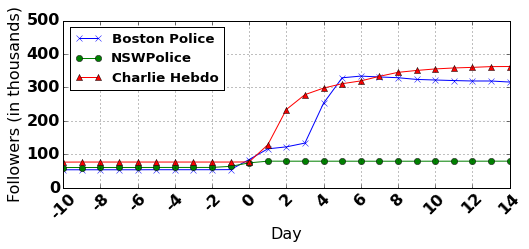

,Date,Activity,p,Before Mean,After Mean,Event
0,2013-04-15 04:00:00,Avg,6.827226e-07,54340.100000,263785.773577,84796.50376
1,2014-12-15 05:00:00,Avg,5.804479e-22,61413.730000,79557.104981,74836.72414
2,2015-01-10 05:00:00,Avg,6.350346e-10,106559.039293,343468.458333,298183.66670


In [18]:
statsList = []

fig = pylab.figure(figsize=(8,3))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
matplotlib.rc('font', **font) 
ax = pylab.gca()
ax.set_xlabel('Day')
ax.set_ylabel('Followers (in thousands)')

xtickArr = range(0, 31, 2)
plt.xticks(xtickArr, [y - 10 for y in xtickArr], rotation=45)
plt.grid(b=True)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: int(x) / 1000))   

labelMap = {"Boston":"Boston Police", "Sydney":"NSWPolice", "Paris":"Charlie Hebdo"}

counter = 0
for eventName in ["Boston", "Sydney", "Paris"]:
    print eventName
    counter += 1
    eventData = eventMap[eventName]
    
    df = pd.read_csv(eventData["file"], header=None, names=["Date", "Sum", "Count", "Avg"], parse_dates=["Date"])

    df = df.sort("Date")
    df.index = range(0, len(df))
    
    smallDf = df[eventData["range"][0]:eventData["range"][1]]
    smallDf.index = range(0, smallDf.shape[0])
    
    thisMax = max(smallDf["Avg"])
    yMaxLim = 500000 if thisMax > 100000 else 500000
    ax.set_ylim((0, yMaxLim))

    lineTypeArr = ["+", "x", "o", "^", "v", "s"]
    
    plt.plot(smallDf["Avg"], label=labelMap[eventName], marker=lineTypeArr[counter])

    
    splitIndex = eventData["splitIndex"]
    dateIndex = splitIndex
    
    x = "Avg"
    (t, p) = scipy.stats.ttest_ind(smallDf[x][0:splitIndex], smallDf[x][splitIndex:], equal_var=False)
    infoTuple = (smallDf["Date"][dateIndex], x, p, smallDf[x][0:splitIndex].mean(), smallDf[x][splitIndex:].mean(), smallDf[x].tolist()[splitIndex])
    statsList.append(infoTuple)
    print x, smallDf["Date"][dateIndex], p, smallDf[x][0:splitIndex].mean(), smallDf[x][splitIndex:].mean()
    
    dateList = map(lambda x: re.sub("0.:00:00", "", x.__str__()), smallDf["Date"].tolist())
    dateList = map(lambda x: re.sub("201[3-5]-", "", x), dateList)

ax.set_xlim((0,24))

fontP = FontProperties()
fontP.set_size('small')

ax.legend(loc=2, prop=fontP )
fig.savefig("nsf_report/merged_followers.pdf", transparent=True, bbox_inches='tight', pad_inches=0.1) 
plt.show()

statsDf = pd.DataFrame(statsList, columns=["Date", "Activity", "p", "Before Mean", "After Mean", "Event"])
statsDf

In [25]:
# create a second figure for the legend
figLegend = pylab.figure(figsize = (15,1.5))

# produce a legend for the objects in the other figure
pylab.figlegend(*ax.get_legend_handles_labels(), 
#                 bbox_to_anchor=(0., 1.02, 1., .102),
           ncol=6, mode="expand",
                loc =10)

figLegend.savefig("gen_legend_followers.pdf", frameon=True)

In [1]:
fig = pylab.figure(figsize=(5,5))
ax = fig.gca()

ax.bar(range(5), range(5), label="Affected Ind.", color="#E8D044")
ax.bar(range(5), range(5), label="Infrast. & Utilities", color="#365877")
ax.bar(range(5), range(5), label="Donat. & Volun.", color="#8BBF46")
ax.bar(range(5), range(5), label="Caution & Advice", color="#DC3027")
ax.bar(range(5), range(5), label="Sympathy", color="#8A468B")
ax.bar(range(5), range(5), label="Other Useful info", color="#80B1DC")
ax.bar(range(5), range(5), label="Not Relevant", color="#BEBEBE")

# create a second figure for the legend
figLegend = pylab.figure(figsize = (15,1.5))

# produce a legend for the objects in the other figure
pylab.figlegend(*ax.get_legend_handles_labels(), 
#                 bbox_to_anchor=(0., 1.02, 1., .102),
           ncol=3, mode="expand",
                loc =10)

figLegend.savefig("gen_legend_content.pdf", frameon=True)



NameError: name 'pylab' is not defined